# Theory

**How the Gradient Descent Algorithm works:**

![gd_theory](theory/8.png)

**Different approaches to implement the GD algorithm:**

![1](theory/9.png)
![1](theory/10.png)

# Implementation

In [41]:
#imports
import numpy as np
import matplotlib.pyplot as plt

## Regression

Generate random data

In [42]:
def gen_data(count=500, noise=10, slope=6, intercept=8):
    x = np.linspace(-10, 10, count)
    noise = np.random.randn(count) * noise
    y = slope * x + intercept + noise
    return x, y

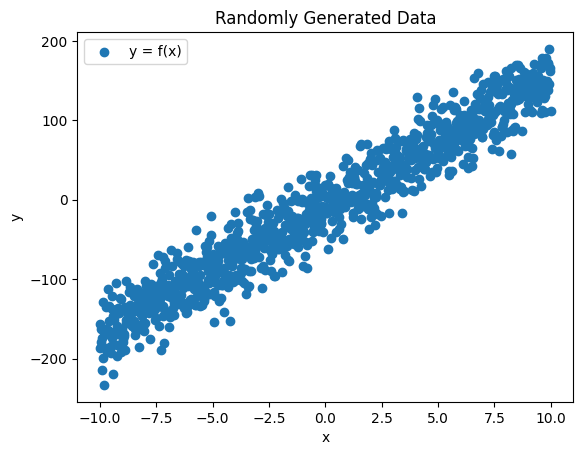

In [43]:
n = 1000
true_slope = 16
true_intercept = -8
noise = 25
x, y = gen_data(n, noise, true_slope, true_intercept)
plt.scatter(x, y, label="y = f(x)")
plt.title("Randomly Generated Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**Implementing Batch Gradient Descent**

In [44]:
# Hypothesis --> H_w(x) = (w0 + w1 * x)
def h_w(x, w):
    return w[0] + w[1] * x


# Cost Function (SSE here)
def cost_function(x, y, w):
    return np.sum((h_w(x, w) - y)**2) / len(x)


def gradient_descent(x, y, w, alpha, steps):
    m = len(x)
    
    for i in range(steps):
        grad_w0 = np.sum(h_w(x,w) - y) / m
        grad_w1 = np.sum((h_w(x,w) - y) * x) / m
        w[0] -= alpha * grad_w0
        w[1] -= alpha * grad_w1

    return w

**Run Gradient Descent**

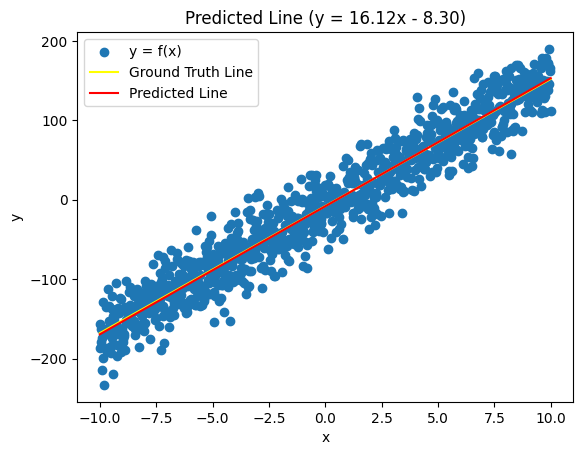

In [45]:
w_init = [0, 0]
w_final = gradient_descent(x, y, w_init, 0.05, 100)
y_hat = w_final[0] + w_final[1] * x
# Visualize the predicted line
plt.scatter(x, y, label="y = f(x)")
plt.plot(x, (true_slope*x + true_intercept), color='yellow', label="Ground Truth Line")
plt.plot(x, y_hat, color='red', label="Predicted Line")
plt.title(f"Predicted Line (y = {w_final[1]:.2f}x {"+" if (w_final[0] >= 0) else "-"} {np.abs(w_final[0]):.2f})")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Testing the stochastic gradient descent regressor (SGDRegressor) from SKLearn

In [46]:
from sklearn.linear_model import SGDRegressor

x_2d = x.reshape(-1, 1) # made the inputs to a 2d array since sklearn expects a column of samples for every feature

model = SGDRegressor(loss='squared_error')
model.fit(X=x_2d, y=y)

SGDRegressor()

In [47]:
sk_slope = model.coef_[0]
sk_intercept = model.intercept_[0]

print(f'''The ground truth line:\n y = {true_slope}x {"+" if (true_intercept >= 0) else "-"} {np.abs(true_intercept):.2f}
predicted lines:
batch gd simple regressor:\n y = {w_final[1]:.2f}x {"+" if (w_final[0] >= 0) else "-"} {np.abs(w_final[0]):.2f}
the scikit-learn's SGDRegressor:\n y = {sk_slope:.2f}x {"+" if (sk_intercept >= 0) else "-"} {np.abs(sk_intercept):.2f}
''')

The ground truth line:
 y = 16x - 8.00
predicted lines:
batch gd simple regressor:
 y = 16.12x - 8.30
the scikit-learn's SGDRegressor:
 y = 16.15x - 8.40



**Compared to our batch GD regressor**

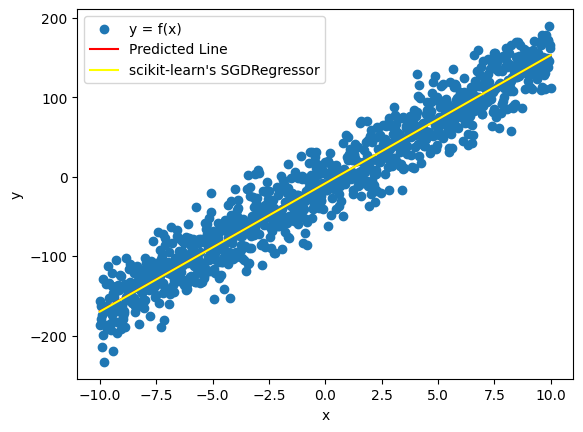

In [48]:
plt.scatter(x, y, label="y = f(x)")
plt.plot(x, y_hat, color='red', label="Predicted Line")
plt.plot(x, model.predict(x_2d), color='yellow', label="scikit-learn's SGDRegressor")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Tracking the path of the optimization process

Suppose we want to optimize the weights for this equation:
$y(w_0, w_1)=w_0^2 + 3w_1^2 + 1$


The gradient of this function 
$\rightarrow \nabla y(w_0, w_1)=
\begin{pmatrix}
\frac{\partial y}{\partial w_0} \cr
\frac{\partial y}{\partial w_1} \cr
\end{pmatrix}
=\begin{pmatrix}
2w_0 \cr
6w_1 \cr
\end{pmatrix}$ 

### Define the cost function

In [49]:
def y_convex(w):
    return (w[0]**2) + (3 * w[1]**2) + 1

def grad_y(w):
    return np.array([2*w[0], 6*w[1]])

### Implement Gradient Descent

In [50]:
# GD function for this purpose
def gradient_descent_p(grad, w_init, alpha, steps):
    w = np.array(w_init)
    path = [w.copy()] # adding initial weights to begin the path
    cost_history = []
    
    for i in range(steps):
        grad_w = grad(w)
        w = w - alpha * grad_w
        path.append(w.copy())
        cost_history.append(y_convex(w).copy())

    return np.array(path), np.array(cost_history)

### Visualize the Gradient Descent Path

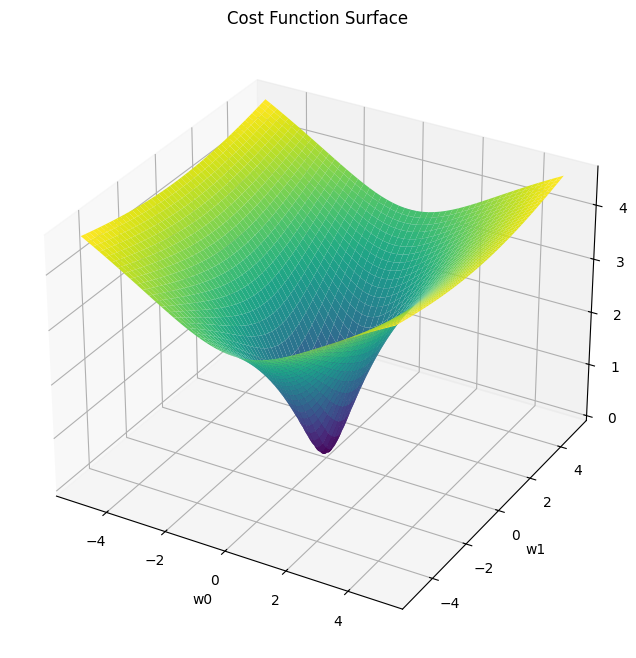

In [51]:
w_init = [4, 4]
iters = 50
learning_rate = 0.1
path_y, cost_history = gradient_descent_p(grad_y, w_init, learning_rate, iters)

w0_values = np.linspace(-5, 5, 400)
w1_values = np.linspace(-5, 5, 400)
W0, W1 = np.meshgrid(w0_values, w1_values)
y_values = y_convex([W0, W1])
y_log = np.log(y_values) # We'll apply logarithm for better a understanding

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, y_log.T, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('(y(w))')
plt.title("Cost Function Surface")

plt.show()

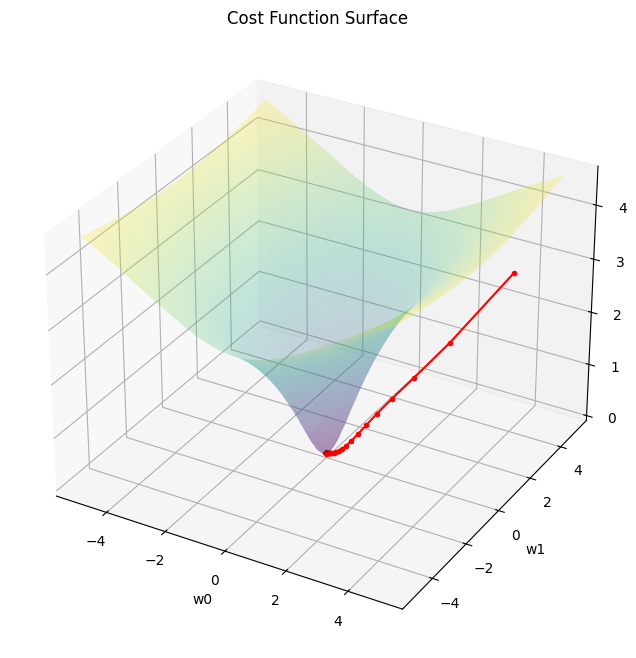

In [52]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, y_log.T, cmap='viridis', alpha=0.25) # changed alpha to blur the surface
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('(y(w))')
plt.title("Cost Function Surface")

w0_history = path_y[:, 0]
w1_history = path_y[:, 1]
cost_history_log = np.log(cost_history)
ax.plot(w0_history[:iters], w1_history[:iters], cost_history_log, marker='o', color='r', label='GD Path', markersize=3)

plt.show()